<a href="https://colab.research.google.com/github/Muskuu1109/EDA-ASSIGNMENT/blob/main/Amazon_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("amazon.csv")  # Update with your actual file path

# Get basic info about the dataset
print(df.info())

# Summary statistics for numeric columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

Missing values per column:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


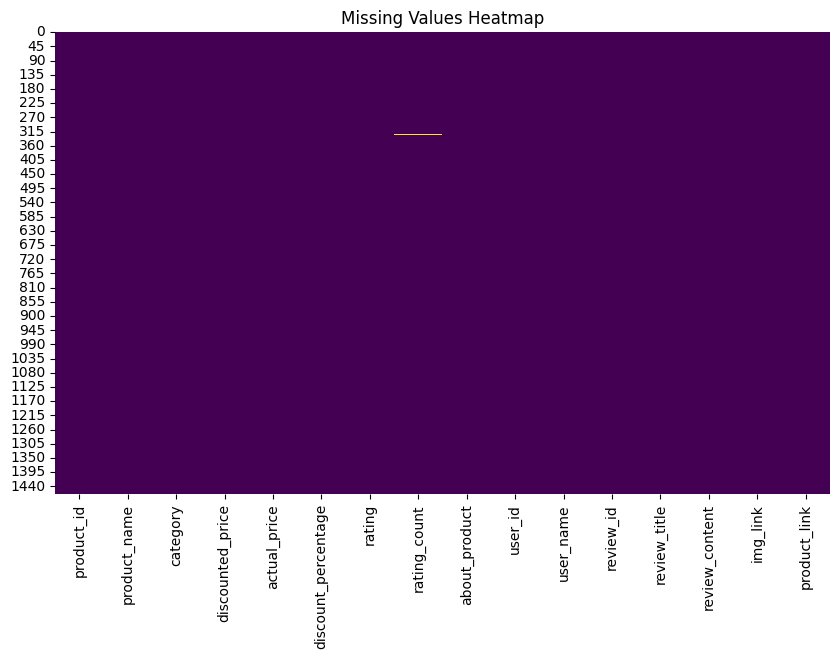

In [2]:
# Check for missing values in each column
missing_values = df.isnull().sum()

print("Missing values per column:")
print(missing_values)

# Visualizing missing values with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

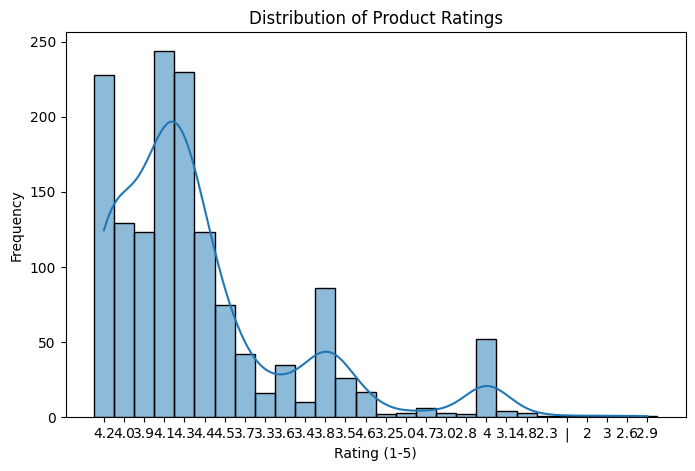

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of product ratings
plt.figure(figsize=(8, 5))
sns.histplot(df["rating"], bins=5, kde=True)

plt.title("Distribution of Product Ratings")
plt.xlabel("Rating (1-5)")
plt.ylabel("Frequency")
plt.show()

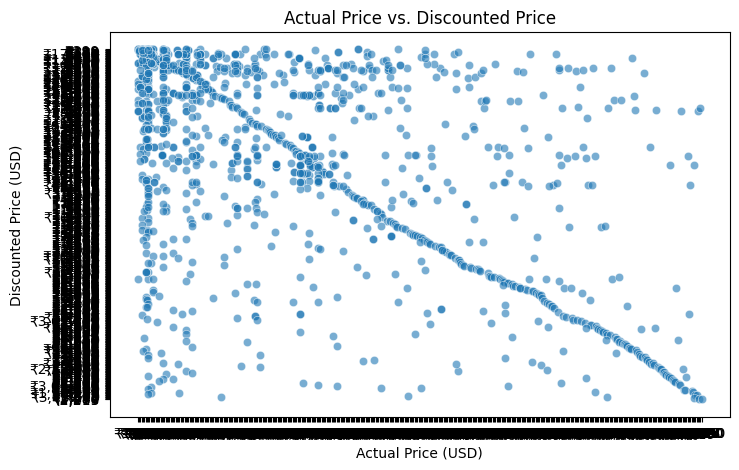

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for actual price vs. discounted price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["actual_price"], y=df["discounted_price"], alpha=0.6)

plt.title("Actual Price vs. Discounted Price")
plt.xlabel("Actual Price (USD)")
plt.ylabel("Discounted Price (USD)")
plt.show()

Top-rated product categories:
category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Acc

<ipython-input-8-cae0a4bc0454>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_by_category.index, y=top_rated_by_category.values, palette="coolwarm")


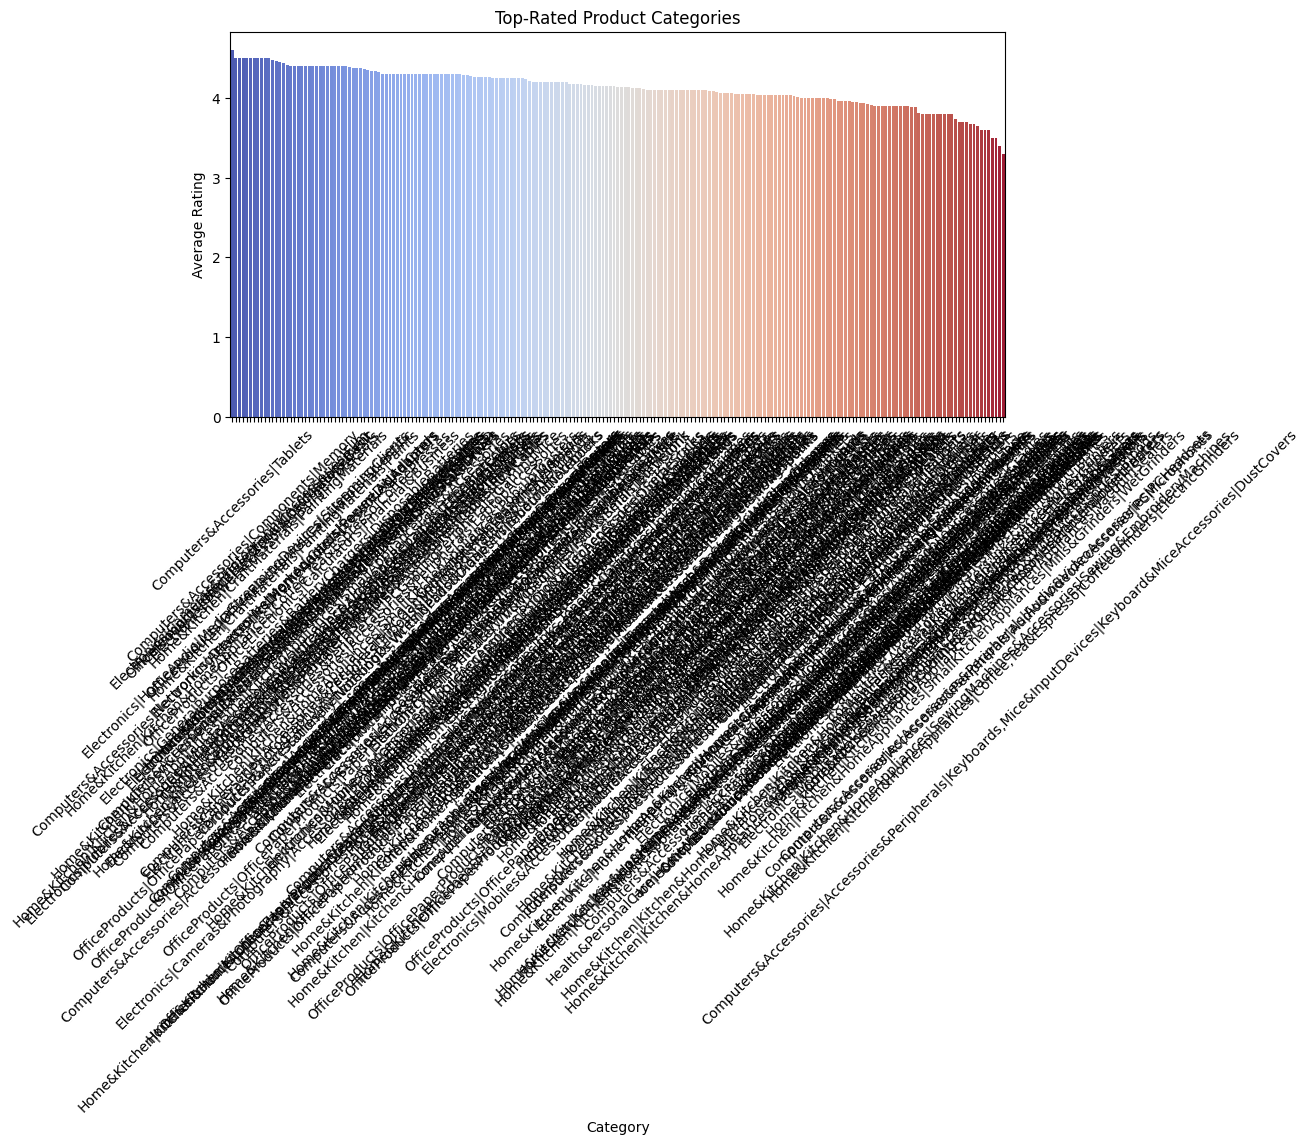

In [8]:
# Compute the average rating per category
# Convert 'rating' column to numeric, handling errors
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

top_rated_by_category = df.groupby("category")["rating"].mean().sort_values(ascending=False)

print("Top-rated product categories:")
print(top_rated_by_category)

# Visualizing average ratings by category
plt.figure(figsize=(10, 5))
sns.barplot(x=top_rated_by_category.index, y=top_rated_by_category.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top-Rated Product Categories")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.show()

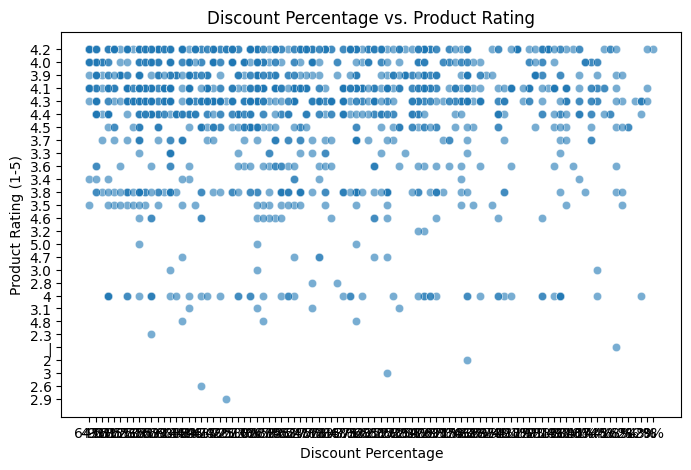

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for discount percentage vs. rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["discount_percentage"], y=df["rating"], alpha=0.6)

plt.title("Discount Percentage vs. Product Rating")
plt.xlabel("Discount Percentage")
plt.ylabel("Product Rating (1-5)")
plt.show()

Top 10 most reviewed products:
                                           product_name rating_count  rating
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...          992     NaN
750        Eveready Red 1012 AAA Batteries - Pack of 10          989     4.3
977   Sennheiser CX 80S in-Ear Wired Headphones with...       98,250     4.1
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...          976     3.7
151   Zoul USB Type C Fast Charging 3A Nylon Braided...          974     4.3
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974     4.3
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...          974     4.3
536   boAt Rockerz 400 Bluetooth On Ear Headphones W...       97,175     4.1
918   boAt Rockerz 400 Bluetooth On Ear Headphones W...       97,174     4.1
1165  Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...           97     4.0


<ipython-input-9-56868d875126>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reviewed_products["product_name"], y=top_reviewed_products["rating_count"], palette="magma")


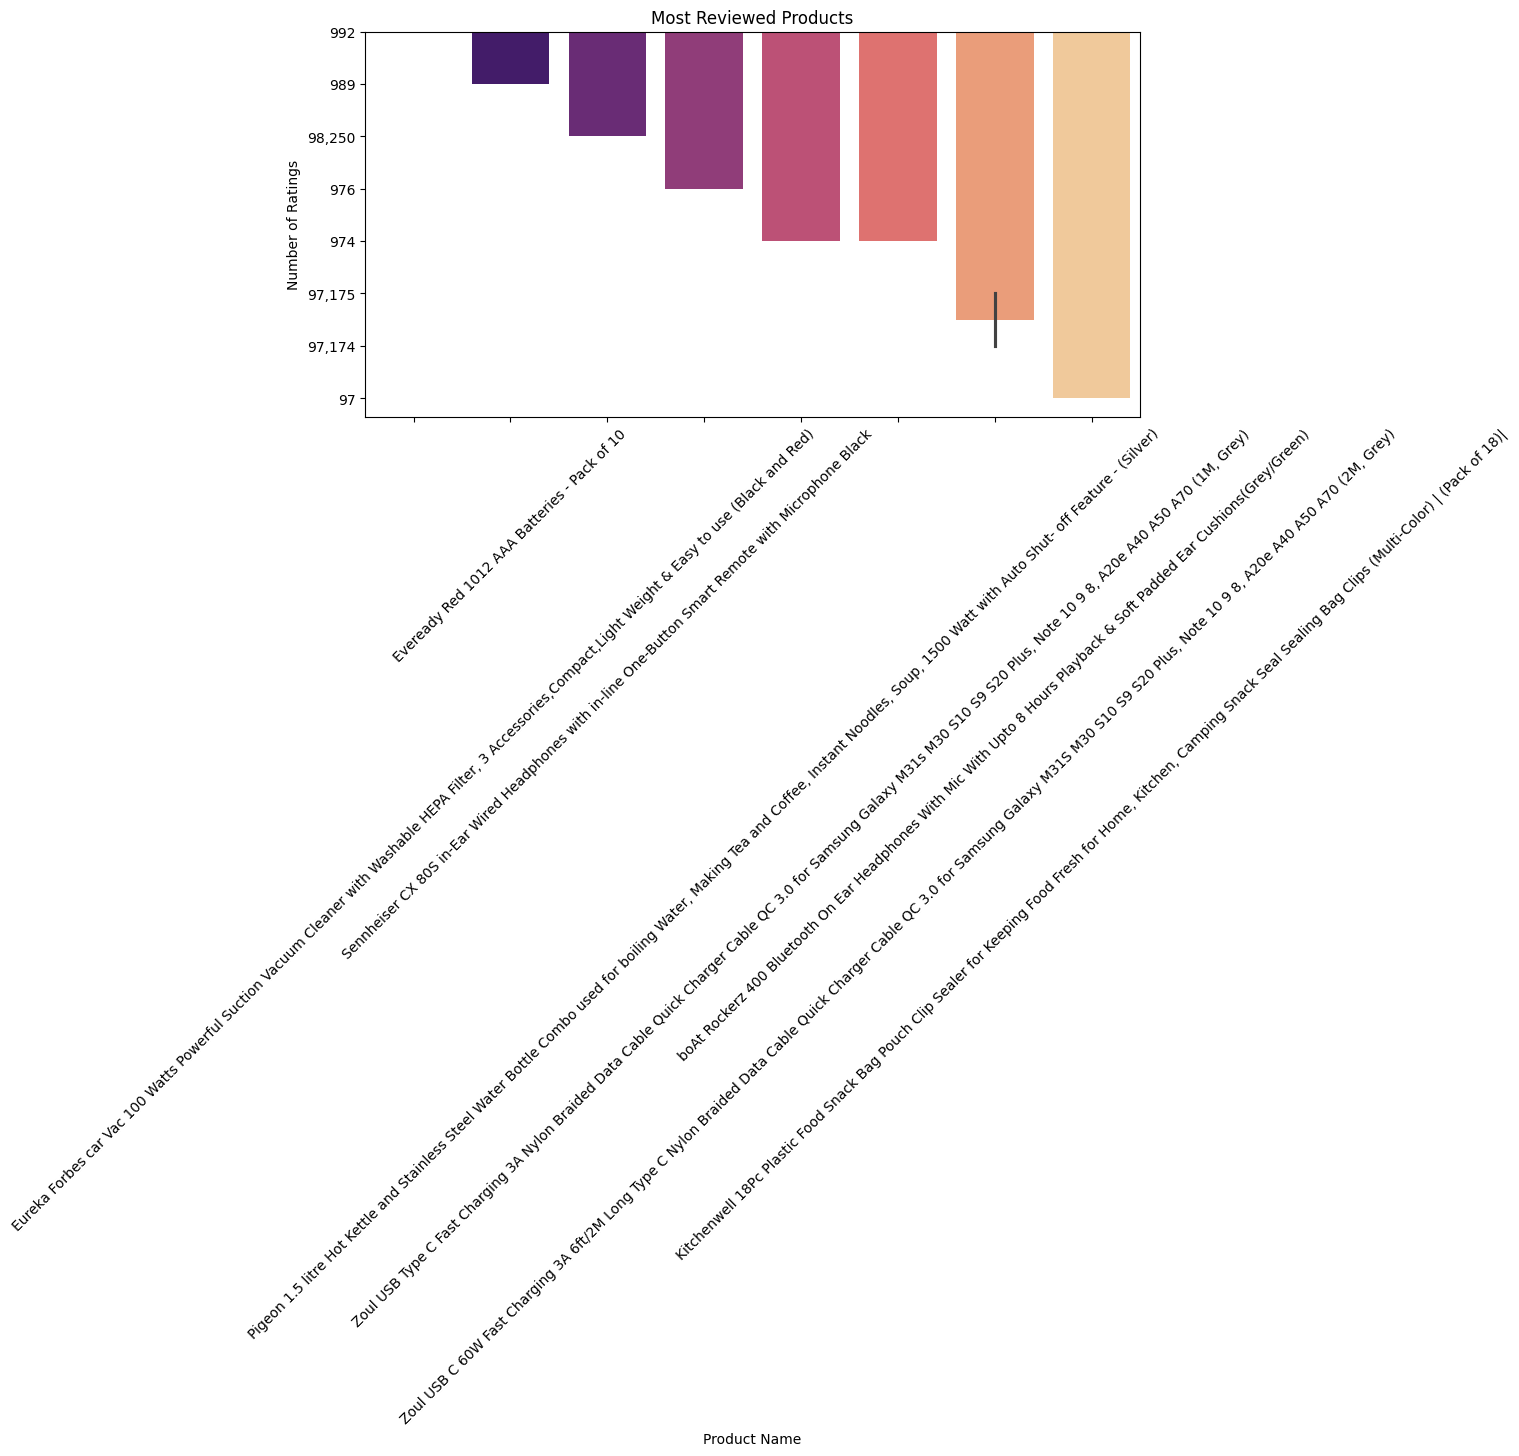

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify the products with the highest rating count
top_reviewed_products = df.sort_values(by="rating_count", ascending=False).head(10)[["product_name", "rating_count", "rating"]]

print("Top 10 most reviewed products:")
print(top_reviewed_products)

# Visualizing the most reviewed products
plt.figure(figsize=(10, 5))
sns.barplot(x=top_reviewed_products["product_name"], y=top_reviewed_products["rating_count"], palette="magma")
plt.xticks(rotation=45)
plt.title("Most Reviewed Products")
plt.xlabel("Product Name")
plt.ylabel("Number of Ratings")
plt.show()

In [13]:
# Ensure 'discount_percentage' is treated as a string before stripping %
df["discount_percentage"] = df["discount_percentage"].astype(str).str.rstrip("%").astype(float)

In [14]:
print(df["discount_percentage"].dtype)  # Check the current data type

# If it's already numeric, you don't need to strip "%"
df["discount_percentage"] = pd.to_numeric(df["discount_percentage"], errors="coerce")

float64
